Importing Libraries


In [17]:
# install packages first in order to be able to install libraries
# !pip3 install pandas
# You will now be able to import required libraries
import pandas as pd         # data manipulation & analysis
import numpy as np          # numerical & mathematical operations
import matplotlib.pyplot as plt         # for creating visualisations
import seaborn as  sns          # for more advanced visualisations 

Load data from a CSV file into a DataFrame

In [18]:
# pd.read_csv('file_path') 
df = pd.read_csv('cleaned_file.csv')

# To view FIRST 5 rows
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [19]:
# To view LAST 5 rows
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
54961,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
54962,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
54963,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
54964,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
54965,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


Data Cleaning

In [20]:
# 1. Standardizing column names
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# 2. Standardizing text fields
df['name'] = df['name'].str.title()
df['gender'] = df['gender'].str.capitalize()
df['blood_type'] = df['blood_type'].str.upper()
df['medical_condition'] =df['medical_condition'].str.capitalize()
df['doctor'] = df['doctor'].str.title()
df['hospital'] = df['hospital'].str.title()
df['insurance_provider'] = df['insurance_provider'].str.title()
df['admission_type'] = df['admission_type'].str.capitalize()
df['medication'] = df['medication'].str.capitalize()

# 3. Check for duplicates
duplicates_count = df.duplicated().sum()

# 4. Check for missing values
missing_values = df.isnull().sum()

# Summary statistics for numerical columns
summary_stats = df.describe()

# Display results
duplicates_count, missing_values, summary_stats


(np.int64(0),
 name                  0
 age                   0
 gender                0
 blood_type            0
 medical_condition     0
 date_of_admission     0
 doctor                0
 hospital              0
 insurance_provider    0
 billing_amount        0
 room_number           0
 admission_type        0
 discharge_date        0
 medication            0
 test_results          0
 dtype: int64,
                 age  billing_amount   room_number
 count  54966.000000    54966.000000  54966.000000
 mean      51.535185    25544.306284    301.124404
 std       19.605661    14208.409711    115.223143
 min       13.000000    -2008.492140    101.000000
 25%       35.000000    13243.718641    202.000000
 50%       52.000000    25542.749145    302.000000
 75%       68.000000    37819.858159    401.000000
 max       89.000000    52764.276736    500.000000)

C:\Users\Thayallen\AppData\Local\Temp\ipykernel_10776\1766237184.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', palette='viridis', order=age_labels)


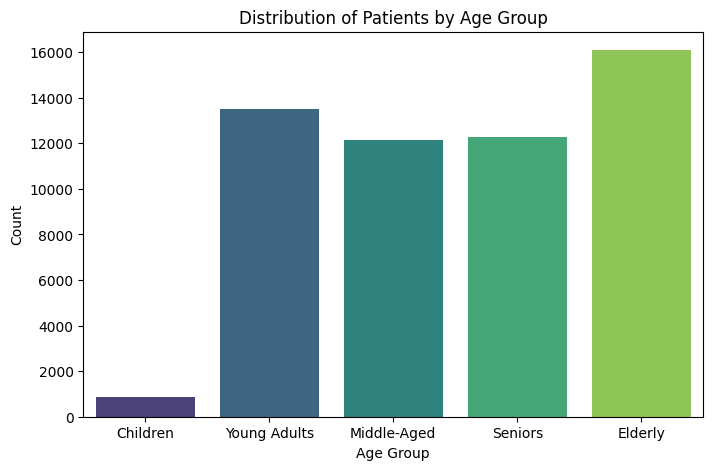

In [21]:
# Grouping ages into categories
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['Children', 'Young Adults', 'Middle-Aged', 'Seniors', 'Elderly']
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Age distribution by age group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Age Group', palette='viridis', order=age_labels)
plt.title("Distribution of Patients by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

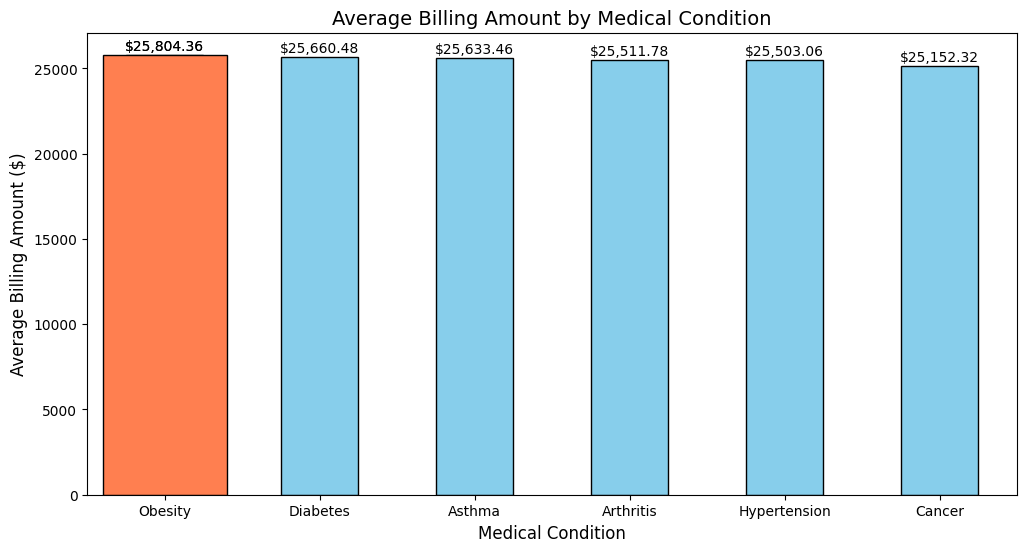

In [22]:
# Grouping the data by 'Medical Condition' and calculating the average billing amount
average_billing_by_condition = df.groupby('medical_condition')['billing_amount'].mean().sort_values(ascending=False)

# Visualizing the average billing amount by medical condition with horizontal values
plt.figure(figsize=(12, 6))
average_billing_by_condition.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

# Highlighting the highest bar
highest_condition = average_billing_by_condition.index[0]
plt.bar(highest_condition, average_billing_by_condition[highest_condition], color='coral', edgecolor='black')

# Adding title and labels
plt.title("Average Billing Amount by Medical Condition", fontsize=14)
plt.xlabel("Medical Condition", fontsize=12)
plt.ylabel("Average Billing Amount ($)", fontsize=12)
plt.xticks(rotation=0)

# Adding horizontal values on top of bars
for bar in plt.gca().patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # Center of the bar
        bar.get_height() + 500,             # Above the bar
        f"${bar.get_height():,.2f}",        # Format value as currency
        ha='center', va='center', fontsize=10, rotation=0  # Horizontal values
    )

plt.show()




C:\Users\Thayallen\AppData\Local\Temp\ipykernel_10776\3549118558.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_admission_custom_data = df.groupby(['age_group_custom', 'admission_type']).size().unstack()


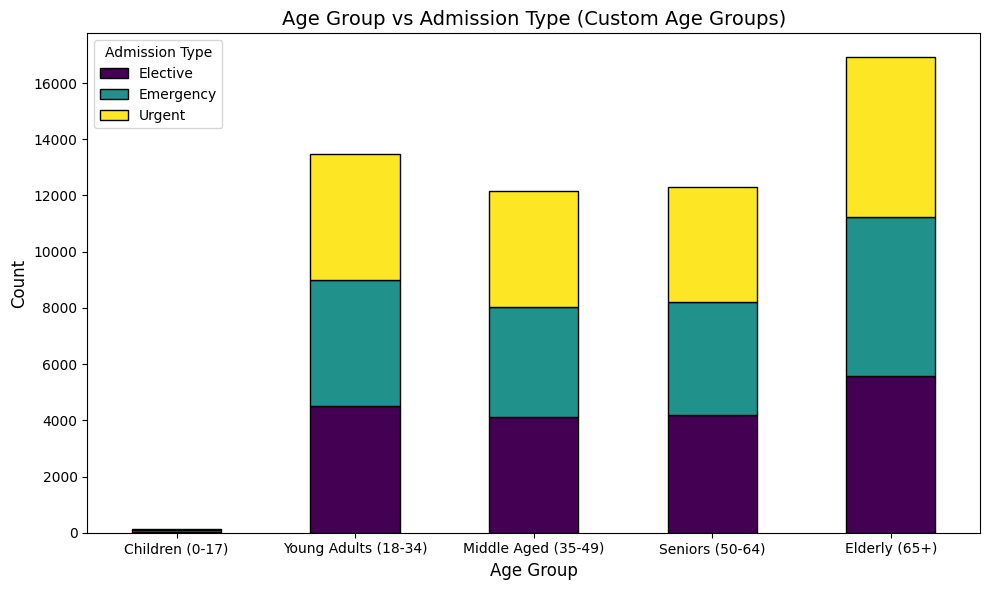

In [30]:
# Define new age groups for the analysis
bins = [0, 17, 34, 49, 64, 100]
labels = ['Children (0-17)', 'Young Adults (18-34)', 'Middle Aged (35-49)', 'Seniors (50-64)', 'Elderly (65+)']
df['age_group_custom'] = pd.cut(df['age'], bins=bins, labels=labels)

# Group data by new Age Group and Admission Type
age_admission_custom_data = df.groupby(['age_group_custom', 'admission_type']).size().unstack()

# Plot Age Group vs Admission Type with custom age groups
age_admission_custom_data.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis', edgecolor='black')

# Adding titles and labels
plt.title("Age Group vs Admission Type (Custom Age Groups)", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Admission Type", fontsize=10)
plt.tight_layout()

plt.show()


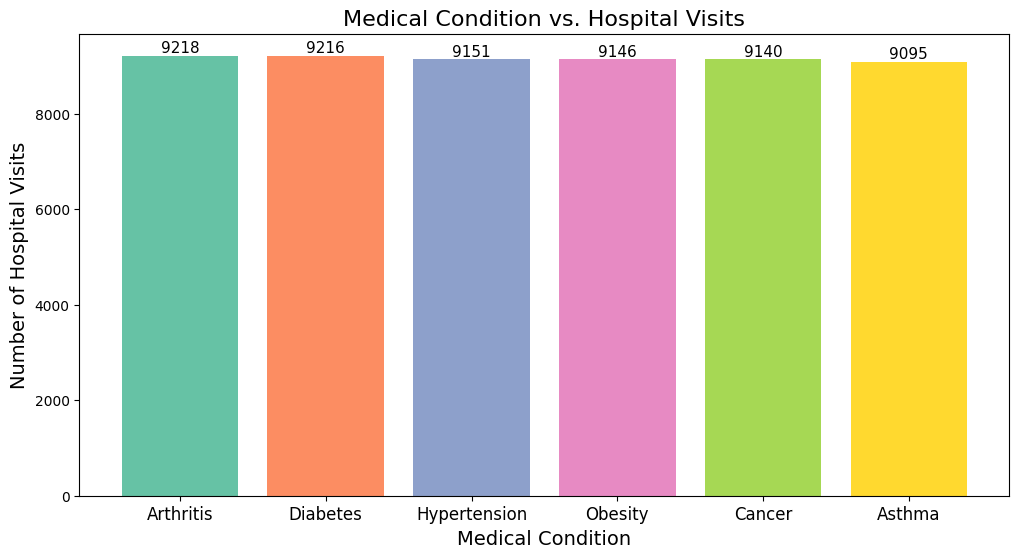

In [ ]:
condition_counts = df['medical_condition'].value_counts()

# Plot graph with set2 colour palette
plt.figure(figsize=(12, 6))
bars = plt.bar(condition_counts.index, condition_counts.values, color=plt.cm.Set2.colors)

# Add value labels above bars using bar_label
plt.bar_label(bars, fontsize=11, color='black')

# Title and labels
plt.title('Medical Condition vs. Hospital Visits', fontsize=16)
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Number of Hospital Visits', fontsize=14)
plt.xticks(fontsize=12)

# Show the plot
plt.show()


C:\Users\Thayallen\AppData\Local\Temp\ipykernel_10776\4062395290.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arthritis_data['Age Group'] = pd.cut(arthritis_data['age'], bins=bins, labels=labels_new)


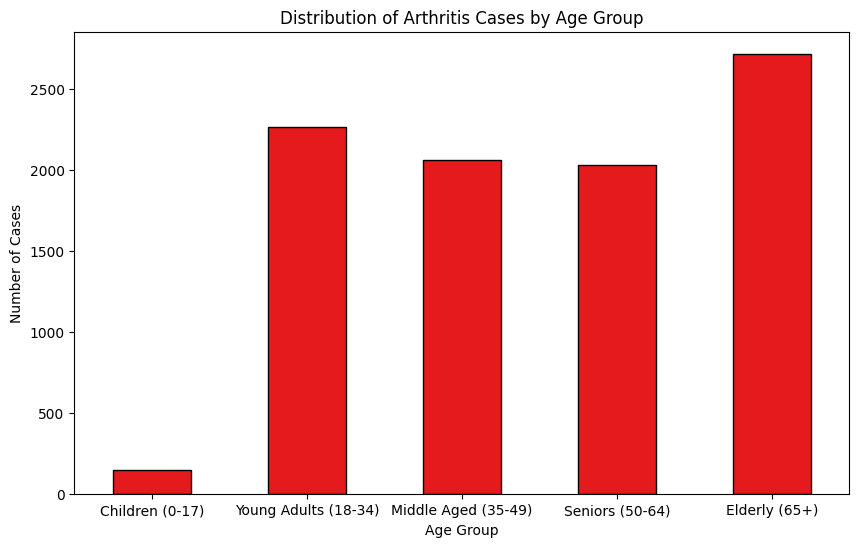

In [29]:
arthritis_data = df[df['medical_condition'] == 'Arthritis']

# Define age groups
bins = [0, 18, 35, 50, 65, 100]
labels_new = ['Children (0-17)', 'Young Adults (18-34)', 'Middle Aged (35-49)', 'Seniors (50-64)', 'Elderly (65+)']
arthritis_data['Age Group'] = pd.cut(arthritis_data['age'], bins=bins, labels=labels_new)

# Group the data by age group
age_distribution = arthritis_data['Age Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', edgecolor='black',colormap= 'Set1')
plt.title('Distribution of Arthritis Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)

# Show plot
plt.show()

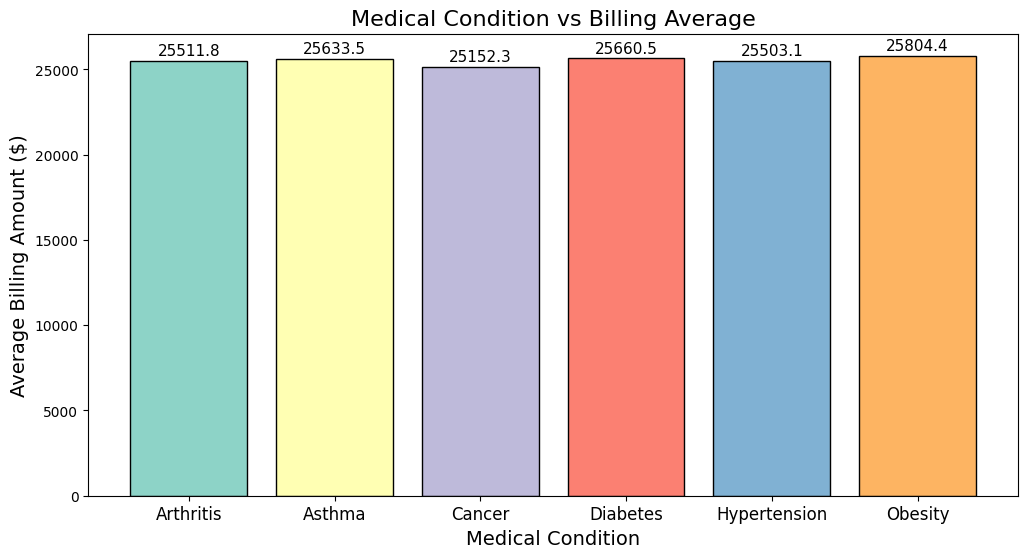

In [ ]:
# Calculate the average billing amount for each medical condition
billing_avg = df.groupby('medical_condition')['billing_amount'].mean()

# Create a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(billing_avg.index, billing_avg.values, color=plt.cm.Set3.colors,edgecolor='black')

# Adding labels above the bars
ax.bar_label(bars, fontsize=11, color='black', padding= 1.5)

# Labels for graph
plt.title('Medical Condition vs Billing Average', fontsize=16)
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Average Billing Amount ($)', fontsize=14)
plt.xticks(fontsize=12)

# Show the chart
plt.show()


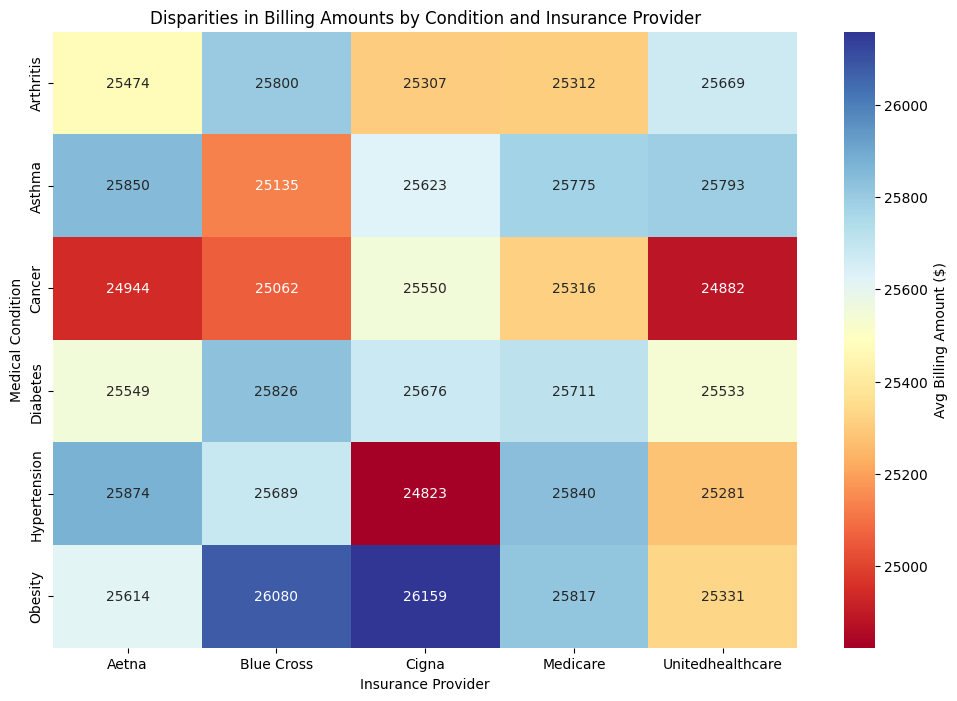

In [ ]:
# Pivot the data to prepare for heatmap
billing_heatmap_data = df.pivot_table(
    index='medical_condition',
    columns='insurance_provider',
    values='billing_amount',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(billing_heatmap_data, annot=True, fmt=".0f", cmap="RdYlBu", cbar_kws={'label': 'Avg Billing Amount ($)'})

# Customize the chart
plt.title('Disparities in Billing Amounts by Condition and Insurance Provider')
plt.ylabel('Medical Condition')
plt.xlabel('Insurance Provider')


# Display the heatmap
plt.show()


<Figure size 1200x600 with 0 Axes>

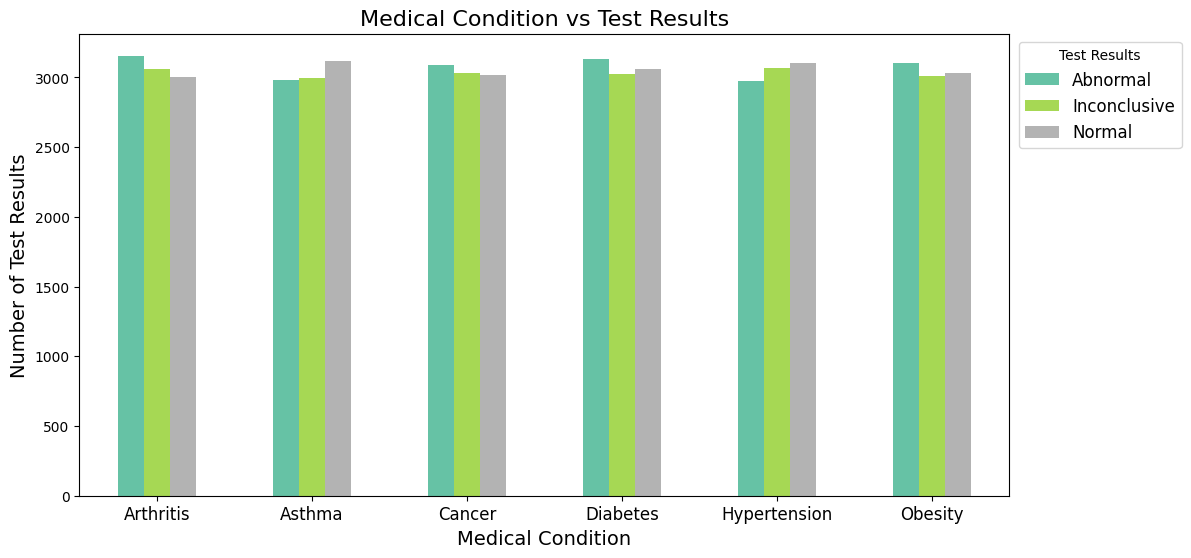

In [28]:

# Combined counts of Medical Condition and Test Result
condition_test_results = df.groupby(['medical_condition', 'test_results']).size().unstack()

# Plotting grouped bar chart
plt.figure(figsize=(12, 6))
x = range(len(condition_test_results.index))  # Positions for medical conditions

condition_test_results.plot(
    kind='bar', 
    figsize=(12, 6),
    colormap='Set2',    
    title='Medical Condition vs Test Results'
)

# Add labels and title
plt.title('Medical Condition vs Test Results', fontsize=16)
plt.xlabel('Medical Condition', fontsize=14)
plt.ylabel('Number of Test Results', fontsize=14)
plt.xticks([pos for pos in x], condition_test_results.index, fontsize=12,rotation=0)
plt.legend(title='Test Results', fontsize=12, bbox_to_anchor=(1.001, 1), loc='upper left')

# Show the plot
plt.show()
